In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import cluster
from datetime import datetime
import seaborn as sn 

In [2]:
import kagglehub
path = kagglehub.dataset_download("arindam235/startup-investments-crunchbase")

C:\Users\Samik\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
datay=pd.read_csv("investments_VC.csv",encoding='ISO-8859-1')
datacp=datay.copy()
datay.head()

,permalink,name,homepage_url,category_list,market,funding_total_usd,status,country_code,state_code,region,...,secondary_market,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H
0,/organization/waywire,#waywire,http://www.waywire.com,|Entertainment|Politics|Social Media|News|,News,"17,50,000",acquired,USA,NY,New York City,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,/organization/tv-communications,&TV Communications,http://enjoyandtv.com,|Games|,Games,"40,00,000",operating,USA,CA,Los Angeles,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,/organization/rock-your-paper,'Rock' Your Paper,http://www.rockyourpaper.org,|Publishing|Education|,Publishing,"40,000",operating,EST,NaN,Tallinn,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,/organization/in-touch-network,(In)Touch Network,http://www.InTouchNetwork.com,|Electronics|Guides|Coffee|Restaurants|Music|i...,Electronics,"15,00,000",operating,GBR,NaN,London,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,/organization/r-ranch-and-mine,-R- Ranch and Mine,NaN,|Tourism|Entertainment|Games|,Tourism,"60,000",operating,USA,TX,Dallas,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
### Crunchbase Startup Investments Dataset - Column Explanations

1. **`permalink`**: A unique URL identifier for the company in the Crunchbase database.
2. **`name`**: The name of the startup/company.
3. **`homepage_url`**: The website URL of the startup/company.
4. **`category_list`**: The list of industries or sectors the startup belongs to (e.g., AI, healthcare).
5. **`market`**: Broad market or sector category the startup operates in.
6. **`funding_total_usd`**: The total amount of funding (in USD) the company has received over time.
7. **`status`**: The current operational status of the company (e.g., operating, acquired, closed).
8. **`country_code`**: The country where the company is based (using ISO country codes).
9. **`state_code`**: The state or region where the company is based (if in the U.S.).
10. **`region`**: The broader geographic region (e.g., Silicon Valley, Midwest).
11. **`city`**: The city where the company is headquartered.
12. **`funding_rounds`**: The number of funding rounds the company has completed.
13. **`founded_at`**: The exact date the company was founded.
14. **`founded_month`**: The month the company was founded.
15. **`founded_quarter`**: The quarter in which the company was founded (Q1, Q2, etc.).
16. **`founded_year`**: The year the company was founded.
17. **`first_funding_at`**: The date of the company's first funding round.
18. **`last_funding_at`**: The date of the company's most recent funding round.
19. **Funding types**: These columns represent the amounts raised through various types of funding rounds:
    - **`seed`**: Seed funding.
    - **`venture`**: Venture capital funding.
    - **`equity_crowdfunding`**: Funding via equity crowdfunding.
    - **`undisclosed`**: Funding rounds where the amount or details were not disclosed.
    - **`convertible_note`, `debt_financing`, `angel`, `grant`**: Various other funding types.
20. **Post IPO funding types**:
    - **`post_ipo_equity`**: Funding received after the company has gone public through equity.
    - **`post_ipo_debt`**: Funding received after the company has gone public through debt.
21. **`secondary_market`**: Transactions in the secondary market.
22. **`product_crowdfunding`**: Funds raised via crowdfunding specific to a product.
23. **Funding rounds by series**:
    - **`round_A`, `round_B`, `round_C`, etc.**: These columns represent the amounts raised in specific funding rounds (Series A, B, C, etc.).


In [6]:
#data cleaning & feature engineering
datay.loc[39, 'first_funding_at'] = '2006-11-14'  #instead of '0026-11-14'
datay['first_funding_at']=pd.to_datetime(datay['first_funding_at'], errors='coerce')
datay['founded_at']=pd.to_datetime(datay['founded_at'], errors='coerce')
datay['first_fund_duration']=datay['first_funding_at']-datay['founded_at']

In [7]:
#data visualisation

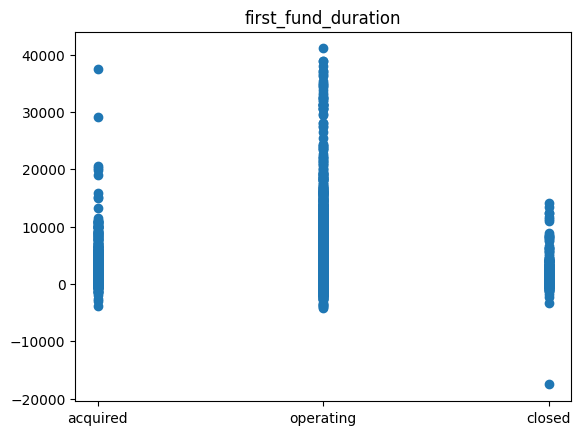

In [8]:
dataydrop=datay.dropna()
plt.title('first_fund_duration')
plt.scatter(x=dataydrop['status'],y=[e.days for e in dataydrop['first_fund_duration']])
plt.show()


status
operating    41829
acquired      3692
closed        2603
Name: count, dtype: int64


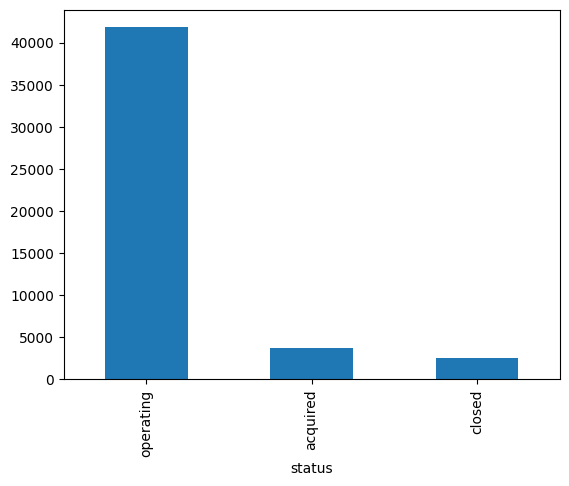

In [9]:

datay['status'].value_counts().plot(kind='bar')
print(datay['status'].value_counts())

In [10]:
#choosing columns to work on (data transformer)
datatmp=pd.DataFrame()
datatmp['status']=datay['status']  
datatmp[' funding_total_usd ']=pd.to_numeric(datay[' funding_total_usd '].str.strip().str.replace(",", ""), errors='coerce')
datatmp['funding_rounds']=datay['funding_rounds']
datatmp['secondary_market']=datay['secondary_market']
datatmp['debt_financing']=datay['debt_financing']
datatmp['product_crowdfunding']=datay['product_crowdfunding']
datatmp['equity_crowdfunding']=datay['equity_crowdfunding']
li=['seed','venture','equity_crowdfunding','undisclosed','convertible_note','debt_financing','angel','grant','post_ipo_equity','post_ipo_debt']
for e in li:
    datatmp[e]=datay[e]
    

for e in "ABCDEFGH":
    datatmp[f'round_{e}']=datay[f'round_{e}']  

datatmp=datatmp.dropna()
#removing outliers
from scipy.stats import zscore
Zscore=datatmp.drop(['status'],axis=1).apply(zscore)

datatmp=datatmp[(Zscore < 3).all(axis=1)]



<Axes: >

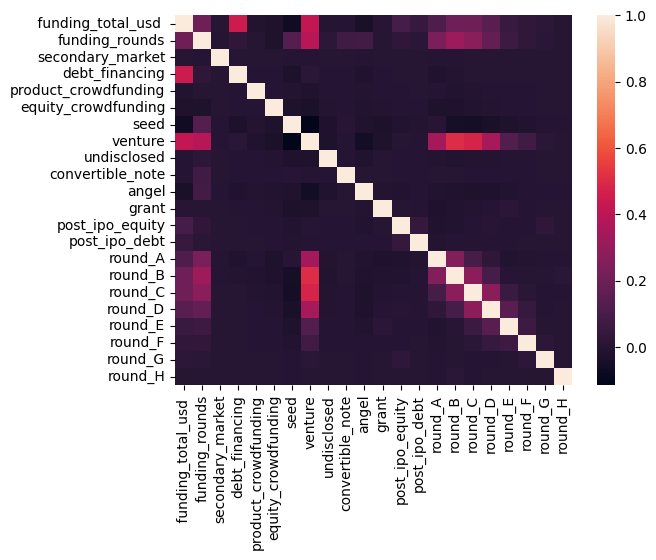

In [114]:
sn.heatmap(datatmp.drop(['status'],axis=1).corr())
#no strong corellation between the features,applying pca may not give good resuls

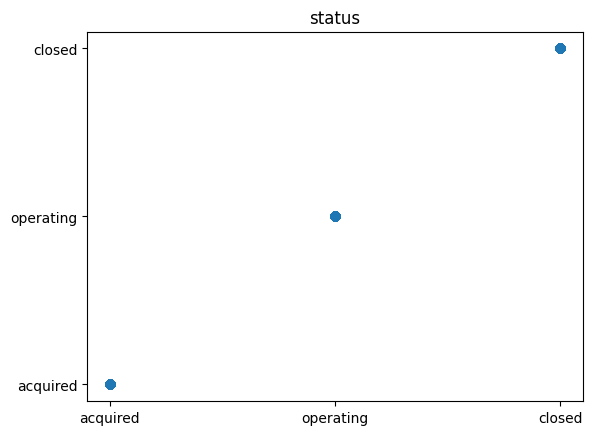

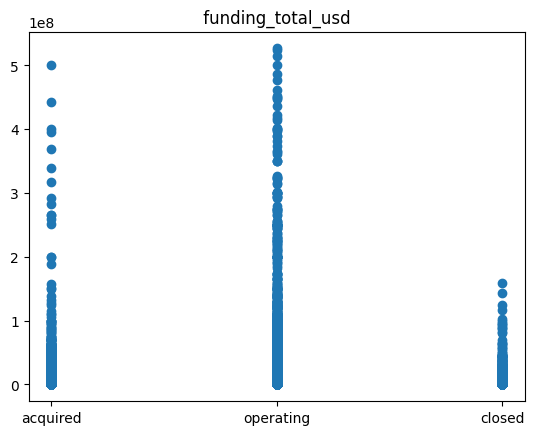

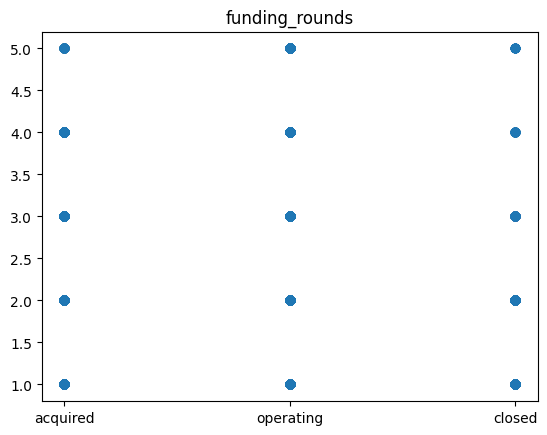

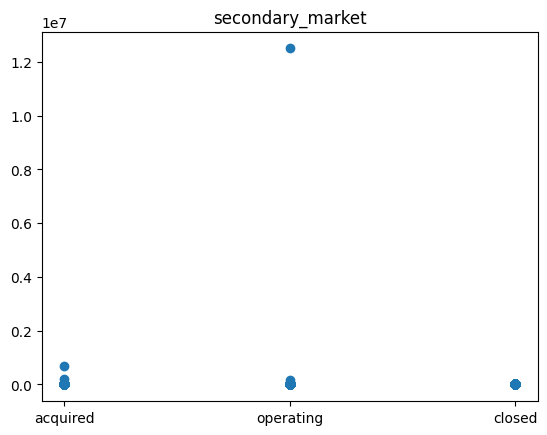

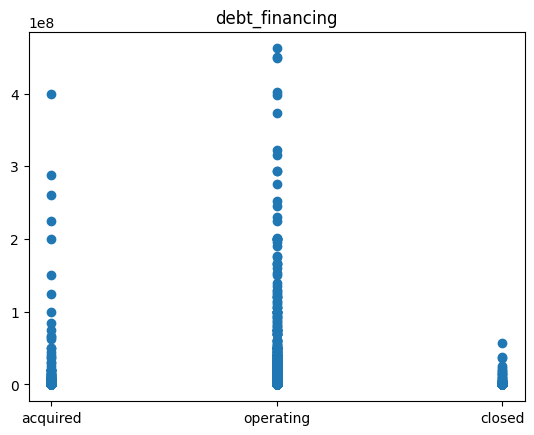

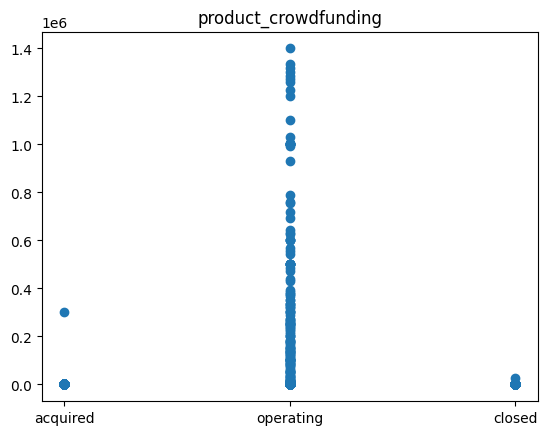

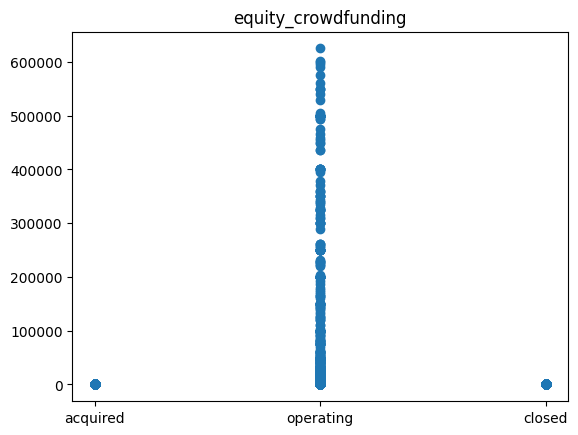

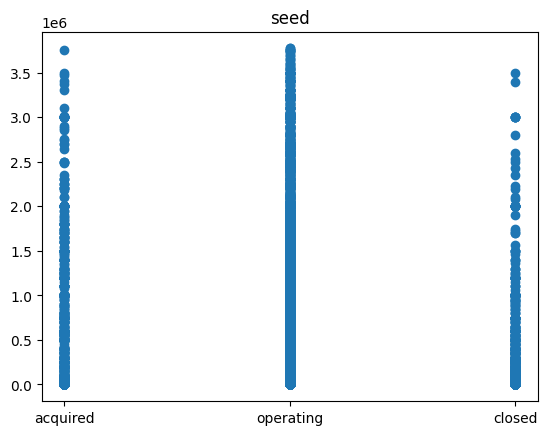

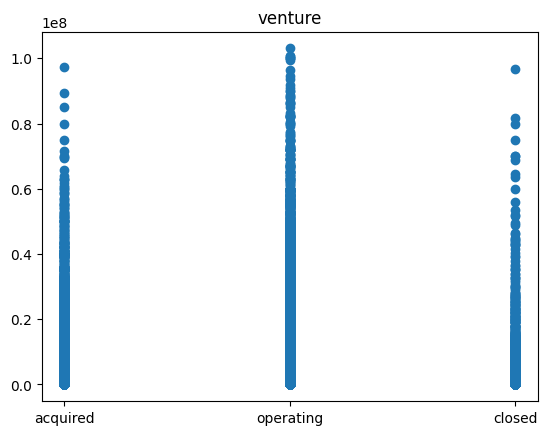

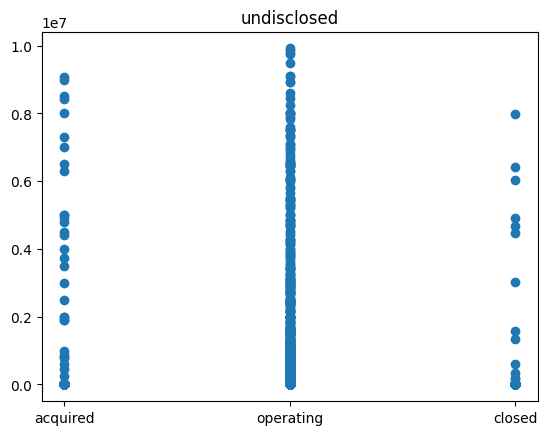

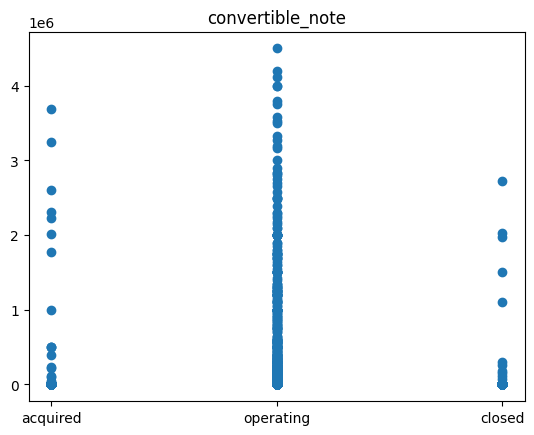

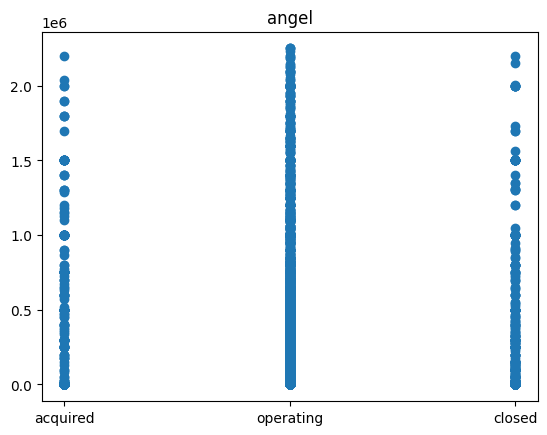

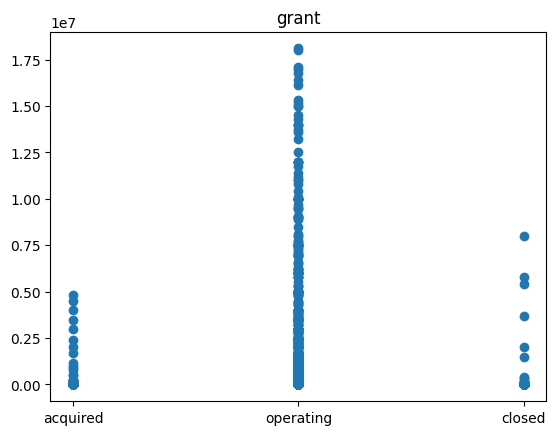

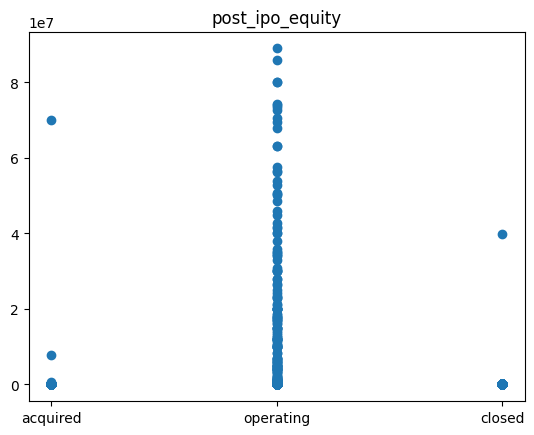

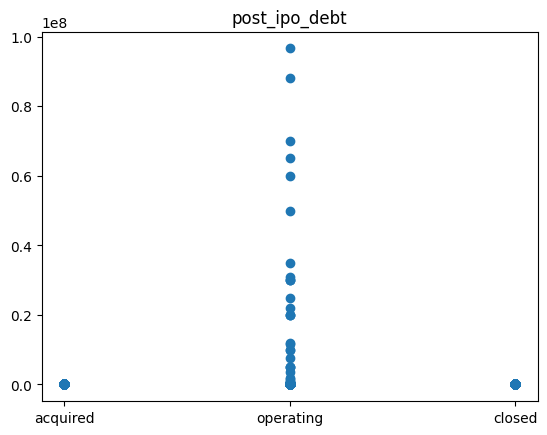

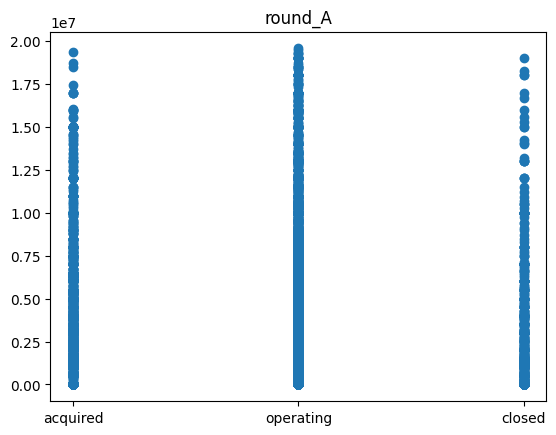

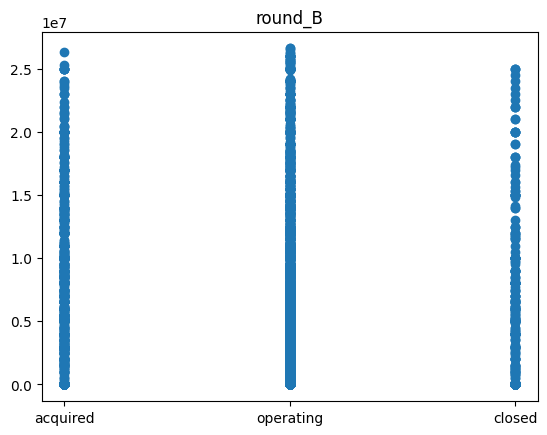

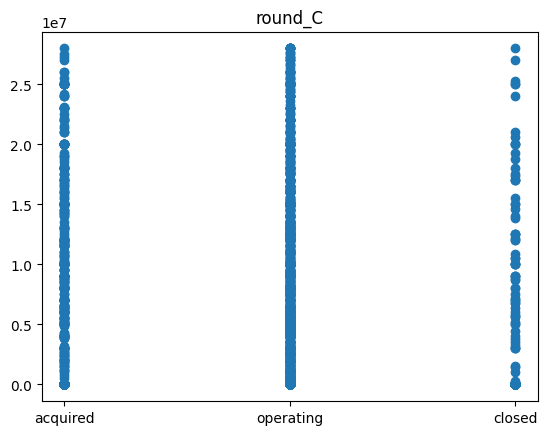

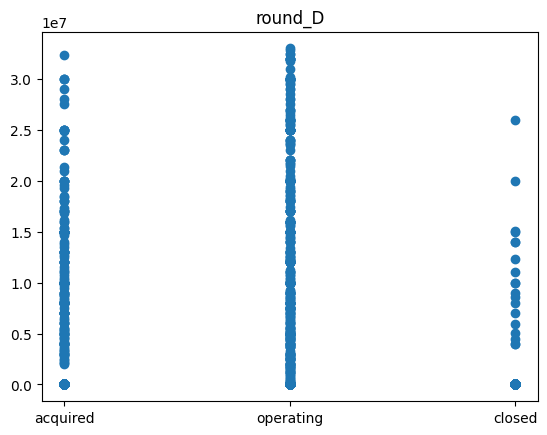

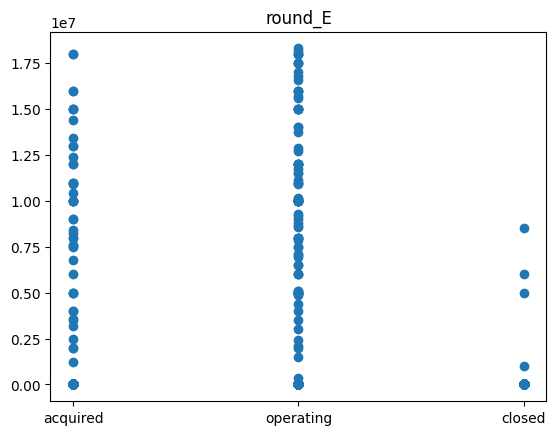

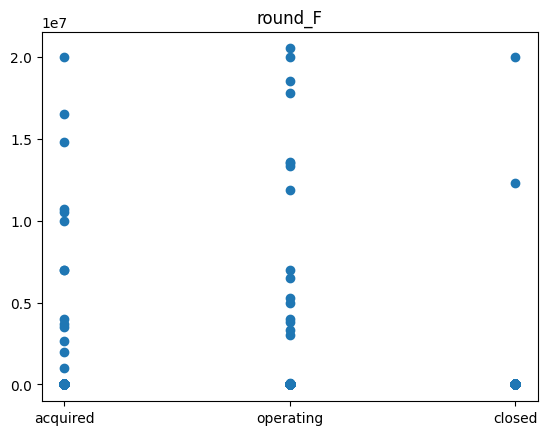

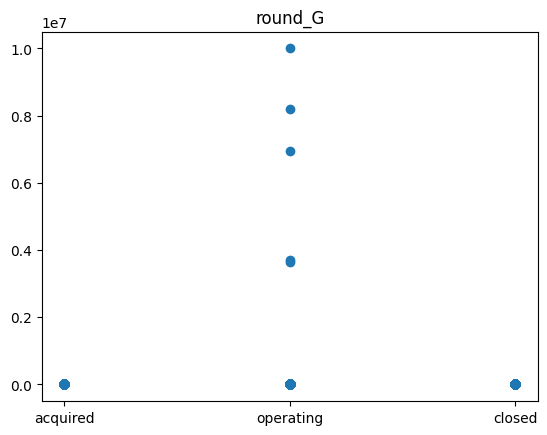

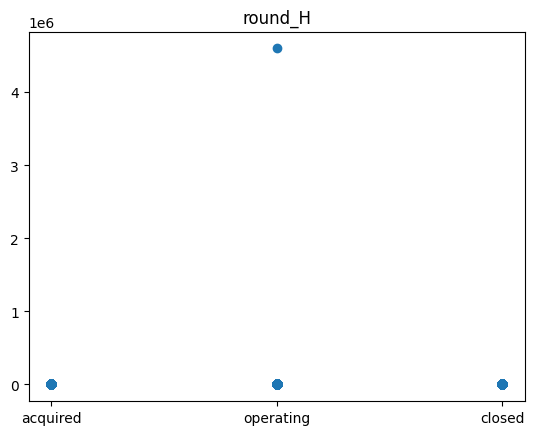

In [115]:
for e in datatmp.columns:
    plt.title(e)
    plt.scatter(x=datatmp['status'],y=datatmp[e])
    plt.show()

In [21]:
#applying kmeans to only 2 features
from sklearn.preprocessing import StandardScaler
kmeans = cluster.KMeans(n_clusters=2)
ss = StandardScaler()
datatmp=pd.DataFrame()
datatmp['status']=datay['status']
datatmp[' funding_total_usd ']=pd.to_numeric(datay[' funding_total_usd '].str.strip().str.replace(",", ""), errors='coerce')
datatmp['funding_rounds']=datay['funding_rounds']
datatmp=datatmp.dropna()
datay_cr = ss.fit_transform(datatmp[[' funding_total_usd ','funding_rounds']])
kmeans.fit(datay_cr)
idk = np.argsort(kmeans.labels_)
print(pd.DataFrame(datatmp.index[idk],kmeans.labels_[idk]))

print(kmeans.transform(datay_cr))


        0
0       0
0   32968
0   32969
0   32970
0   32971
..    ...
0   16455
0   16457
0   16459
0   49437
1   45815

[39802 rows x 1 columns]
[[6.03793678e-01 1.76076459e+02]
 [1.40030106e-01 1.76052922e+02]
 [6.05184089e-01 1.76086467e+02]
 ...
 [2.29197010e+00 1.76062432e+02]
 [5.99616719e-01 1.76032273e+02]
 [1.57768466e+00 1.75801089e+02]]


0.7367268721628883
0.7375883571513804
0.7681673842654455
0.8030616078955257
0.8220405464502989
0.8275665328016297
0.8538555019385926
0.8609608737368529
0.837269569816141
[0.7367268721628883, 0.7375883571513804, 0.7681673842654455, 0.8030616078955257, 0.8220405464502989, 0.8275665328016297, 0.8538555019385926, 0.8609608737368529, 0.837269569816141]


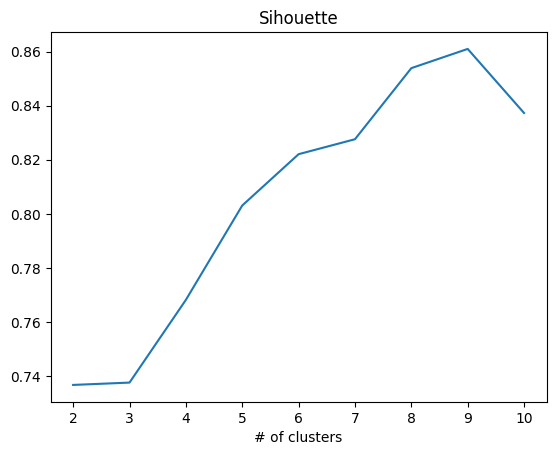

In [22]:
#calculating silhoutte score for 9 values(2 to 10)
from sklearn import metrics

res= np.arange(9, dtype ="double")
SC=[]
for k in np.arange(9):
    km = cluster.KMeans(n_clusters=k+2)
    km.fit(datay_cr)
    SC.append(metrics.silhouette_score(datay_cr,km.labels_))
    print(SC[k])
    
print(SC)

#graphique
import matplotlib.pyplot as plt
plt.title("Sihouette")
plt.xlabel("# of clusters")
plt.plot(np.arange(2,11,1),SC) 
plt.show()

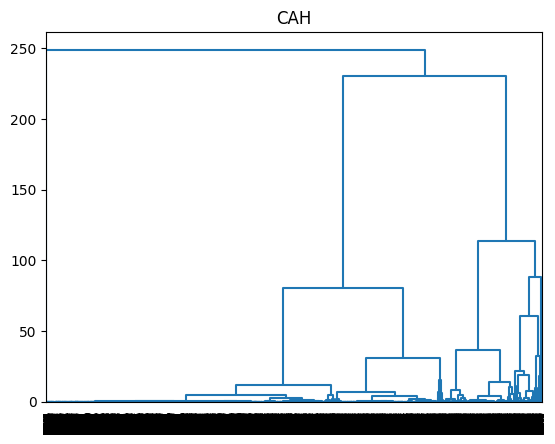

In [129]:
#applying CAH(AgglomerativeClustering) with only 2 features
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

# générer la matrice des liens
Z = linkage(datay_cr,method='ward', metric='euclidean')

Z.shape
#affichage du dendogramme
plt.title("CAH")
dendrogram(Z, color_threshold=0)  
plt.show()

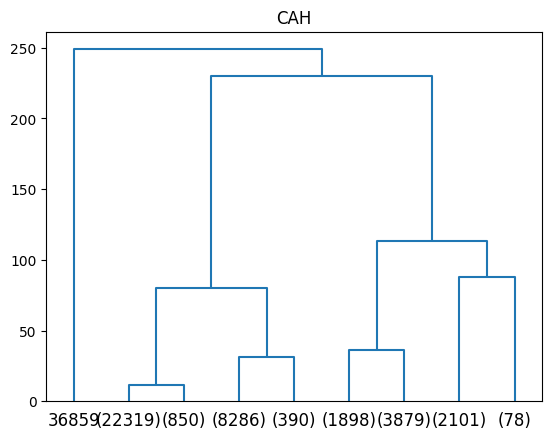

In [135]:
#applying CAH(AgglomerativeClustering)  with only 3 levels
plt.title("CAH")
dendrogram(Z, orientation='top', color_threshold=4, truncate_mode='level', p=3)
plt.show()


In [117]:
#applying CAH (AgglomerativeClustering)
from sklearn.cluster import AgglomerativeClustering



# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(n_clusters=3)

pr=model.fit_predict(datay_cr)

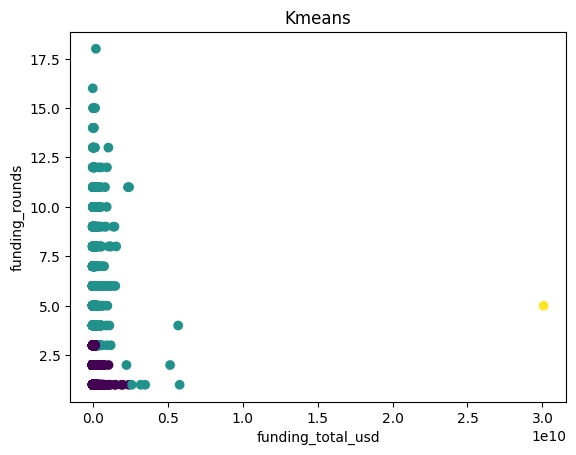

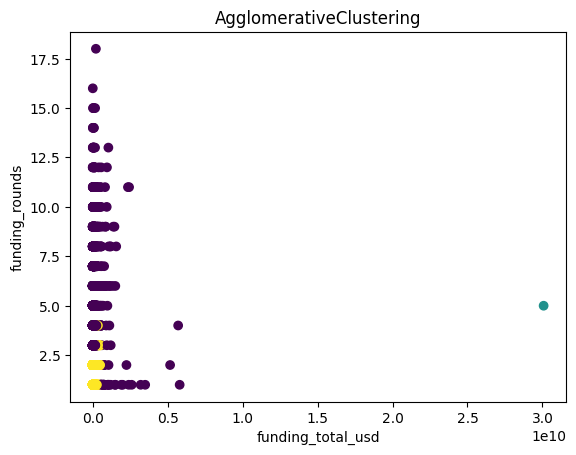

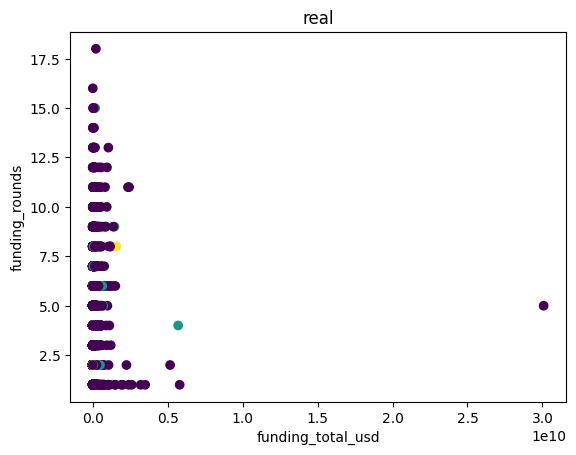

In [128]:
#difference between k-means,Agglomerative Clustering and the real clusters
plt.title('Kmeans')
plt.scatter(x=datatmp[' funding_total_usd '],y=datatmp['funding_rounds'],c=kmeans.labels_)
plt.xlabel('funding_total_usd')
plt.ylabel('funding_rounds')
plt.show()
plt.title('AgglomerativeClustering')
plt.scatter(x=datatmp[' funding_total_usd '],y=datatmp['funding_rounds'],c=pr)
plt.xlabel('funding_total_usd')
plt.ylabel('funding_rounds')
plt.show()
D={'acquired': 1, 'closed': 2, 'operating': 0}
#1 acquired,2 closed, 0 operating
L=[D[datatmp['status'].iloc[i]] for i in range(datatmp['status'].shape[0])]
plt.scatter(x=datatmp[' funding_total_usd '],y=datatmp['funding_rounds'],c=L)
plt.title('real')
plt.xlabel('funding_total_usd')
plt.ylabel('funding_rounds')
plt.show()

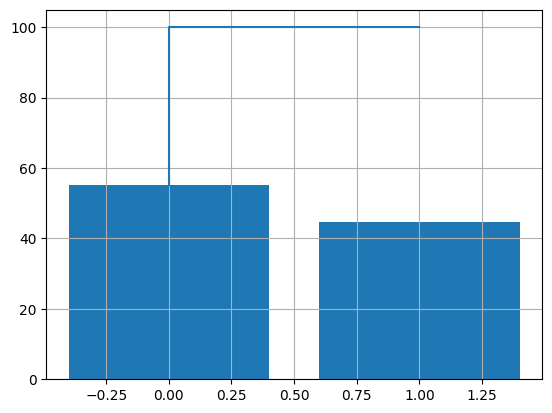

In [22]:

matrice_covariance = np.cov(datay_cr.T)
matrice_covariance
from numpy.linalg import eig

valeurs_propres, vecteurs_propres = eig(matrice_covariance)
valeurs_propres
vecteurs_propres
somme = valeurs_propres.sum()
plt.bar(range(0,2),(valeurs_propres/somme)*100) 
somme_cumulative = np.cumsum((valeurs_propres/somme)*100)
plt.step(range(0,2),somme_cumulative)
plt.grid()

In [18]:
#applying k means with choosed features (no dimensionality reduction)
from sklearn.preprocessing import StandardScaler
kmeans = cluster.KMeans(n_clusters=3)
ss = StandardScaler()
datatmp=pd.DataFrame()
datatmp['status']=datay['status']  
datatmp[' funding_total_usd ']=pd.to_numeric(datay[' funding_total_usd '].str.strip().str.replace(",", ""), errors='coerce')
datatmp['funding_rounds']=datay['funding_rounds']
datatmp['secondary_market']=datay['secondary_market']
datatmp['debt_financing']=datay['debt_financing']
datatmp['product_crowdfunding']=datay['product_crowdfunding']
datatmp['equity_crowdfunding']=datay['equity_crowdfunding']
li=['seed','venture','equity_crowdfunding','undisclosed','convertible_note','debt_financing','angel','grant','post_ipo_equity','post_ipo_debt']
for e in li:
    datatmp[e]=datay[e]
    

for e in "ABCDEFGH":
    datatmp[f'round_{e}']=datay[f'round_{e}']  

datatmp=datatmp.dropna()
datay_cr = ss.fit_transform(datatmp.drop('status',axis=1))
kmeans.fit(datay_cr)
idk = np.argsort(kmeans.labels_)
print(pd.DataFrame(datatmp.index[idk],kmeans.labels_[idk]))

print(kmeans.transform(datay_cr))

        0
0   28376
0   47320
0   27240
0   30008
0   27235
..    ...
1   16821
1   16822
1   16823
1   16815
2   45815

[39802 rows x 1 columns]
[[  6.66328586   1.40562841 262.96719268]
 [  6.19680582   0.41826792 262.94720864]
 [  6.54876485   0.63274855 262.96964083]
 ...
 [  5.87362086   2.41086013 262.95355293]
 [ 10.10799956   7.74747793 263.05351422]
 [  4.81846208   3.23644154 262.71399444]]


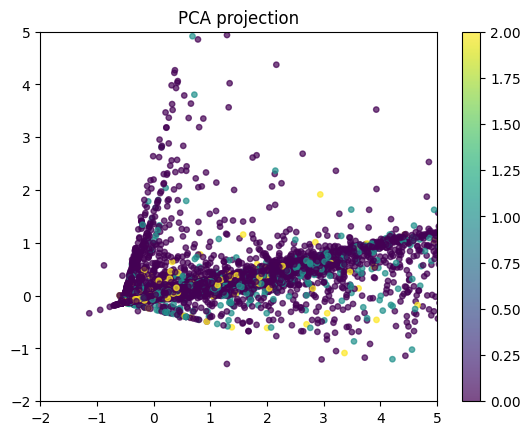

In [19]:
#applying pca with only 2 components
from sklearn import decomposition
pca = decomposition.PCA(n_components=2)
X_pca_scaled = pca.fit_transform(datay_cr)
R={'acquired':1,'operating':0,'closed':2}
plt.xlim(-2,5)
plt.ylim(-2, 5)
plt.scatter(X_pca_scaled[:, 0], X_pca_scaled[:, 1],c=[R[status] for status in datatmp['status']],alpha=0.7,s=15);
plt.colorbar()
plt.title('PCA projection')
plt.show()
#pca.explained_variance_ratio_=[0.14909004, 0.08878779]

[0.14909005 0.08878935 0.08336784 0.05518569 0.05441573 0.04996451
 0.04654583 0.04609953 0.04561918 0.0454965  0.04543575 0.04468485
 0.04381724 0.03735109 0.03517518 0.03478073 0.0320558  0.02675524
 0.02518241 0.00566172 0.00355107 0.00097471]


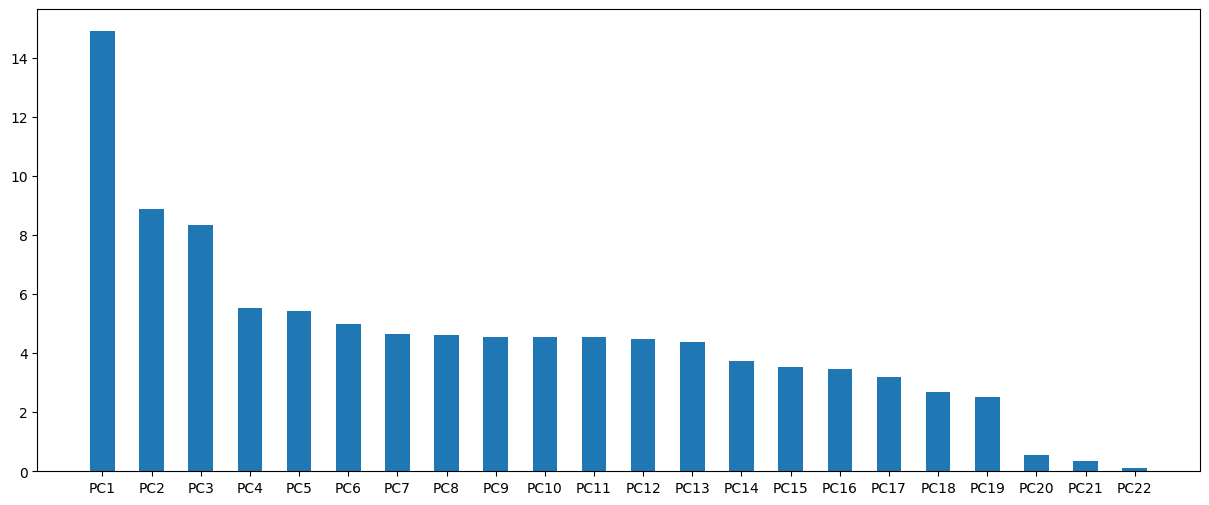

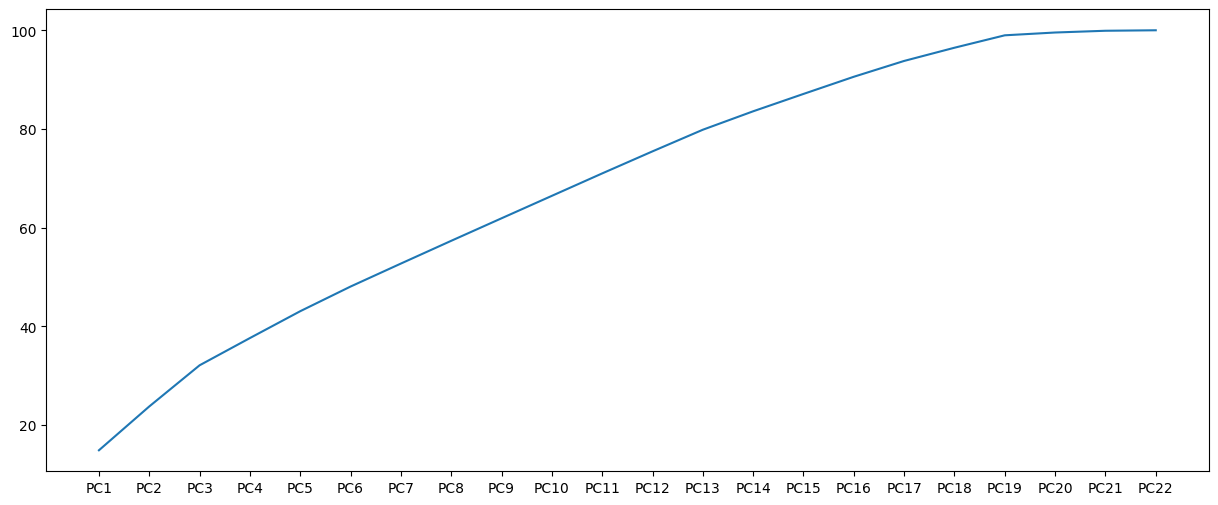

In [20]:
#considering other components
pca = decomposition.PCA()
pca.fit_transform(datay_cr)
print(pca.explained_variance_ratio_)
plt.figure(figsize=(15, 6))
prc=[e*100 for e in pca.explained_variance_ratio_]
plt.bar(x=[i for i in range(len(prc))],height=prc,tick_label=[f"PC{i+1}" for i in range(len(prc))],width=0.5)
plt.show()

plt.figure(figsize=(15, 6))
prcsum=[prc[0]]
for i in range(1,len(prc)):
    prcsum.append(prcsum[i-1]+prc[i])
    
plt.plot([f"PC{i+1}" for i in range(len(prc))],prcsum) 
plt.show()
#we reach 60% after pc8 => try 8 dimensions

In [23]:
#combining PCA with Kmeans
pca = decomposition.PCA(n_components=8)
pca.fit_transform(datay_cr)
datay_pca=pca.transform(datay_cr)
kmeans = cluster.KMeans(n_clusters=3)
kmeans.fit(datay_pca)
idk = np.argsort(kmeans.labels_)
print(pd.DataFrame(datatmp.index[idk],kmeans.labels_[idk]))

print(kmeans.transform(datay_pca))

        0
0       0
0   32662
0   32663
0   32665
0   32667
..    ...
2   22956
2   22950
2   13713
2   46323
2   16813

[39802 rows x 1 columns]
[[9.81001165e-01 2.62767242e+02 6.81170227e+00]
 [2.27707163e-01 2.62753828e+02 6.45624635e+00]
 [5.31523862e-01 2.62772525e+02 6.78278415e+00]
 ...
 [7.50156924e-01 2.62764031e+02 5.77456728e+00]
 [5.46045598e+00 2.62793111e+02 8.60160348e+00]
 [2.72774720e+00 2.62526538e+02 4.68366363e+00]]


In [24]:
#determining the clusters classes
n0={'acquired':0,'operating':0,'closed':0}
n1={'acquired':0,'operating':0,'closed':0}
n2={'acquired':0,'operating':0,'closed':0}
for i in range(len(kmeans.labels_)):
    if(kmeans.labels_[i]==0):
        n0[datatmp['status'][datatmp.index[i]]]=n0[datatmp['status'][datatmp.index[i]]]+1
    elif(kmeans.labels_[i]==1):
        n1[datatmp['status'][datatmp.index[i]]]=n1[datatmp['status'][datatmp.index[i]]]+1
    else:
        n2[datatmp['status'][datatmp.index[i]]]=n2[datatmp['status'][datatmp.index[i]]]+1

print("cluster 1:",n0)
print("cluster 2:",n1)
print("cluster 3:",n2)

cluster 1: {'acquired': 3012, 'operating': 33264, 'closed': 2118}
cluster 2: {'acquired': 0, 'operating': 1, 'closed': 0}
cluster 3: {'acquired': 206, 'operating': 1161, 'closed': 40}
